Paddle-OCR Installation

In [1]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try 'pacman -S
    python-xyz', where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Arch-packaged Python package,
    create a virtual environment using 'python -m venv path/to/venv'.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip.
    
    If you wish to install a non-Arch packaged Python application,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. Make sure you have python-pipx
    installed via pacman.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detailed specification.


In [2]:
%pip install paddleocr

  Using cached paddleocr-2.6.1.3-py3-none-any.whl (445 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Using cached python-docx-0.8.11.tar.gz (5.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.9 MB)
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 5.2 MB/s eta 0:00:0000:0100:01
  Using cached visualdl-2.5.3-py3-none-any.whl (6.3 MB)
  Using cached attrdict-2.0.1-py2.py3-none-any.whl (9.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.3

In [5]:
%pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 MB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 kB 2.7 MB/s eta 0:00:0000:0100:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.23.3
    Uninstalling protobuf-4.23.3:
      Successfully uninstalled protobuf-4.23.3

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importing necessary packages

In [20]:
from matplotlib import pyplot as plt
import cv2
import os
import re

In [6]:
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(lang = 'en')

[2023/06/22 15:10:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

Dealing with multiple images

In [23]:

filtered_numbers = []
# Directory containing the images
def aadhar_number_extraction():
    image_directory = r"C:\Users\user\OneDrive\Alan\Alan's Files\Internship\Aadhar\Aadhar"
    # Process each image in the directory
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            img_path = os.path.join(image_directory, filename)
            print("PATH:",img_path)
            result = ocr.ocr(img_path)
            for res in result:
                for line in res:
                    text = line[1][0]
                    matches = re.findall(r'\b(\d{4}\s?\d{4}\s?\d{4}|\d{8}\s?\d{4}|\d{4}\s?\d{8}|\d{12})\b', text)
                    if matches:
                        filtered_numbers.extend(matches)
                
    #for number in filtered_numbers:
        #print(number)
        #print()


In [24]:
aadhar_number_extraction()

PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\Aadhar\Aadhar\CAAE79308-Aadhar-Front.png
[2023/06/21 16:54:26] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/21 16:54:29] ppocr DEBUG: dt_boxes num : 9, elapse : 3.012993097305298
[2023/06/21 16:54:31] ppocr DEBUG: rec_res num  : 9, elapse : 2.005843162536621
PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\Aadhar\Aadhar\CAAE79309-Aadhar-Front.png
[2023/06/21 16:54:31] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/21 16:54:32] ppocr DEBUG: dt_boxes num : 7, elapse : 0.7363288402557373
[2023/06/21 16:54:33] ppocr DEBUG: rec_res num  : 7, elapse : 1.6561834812164307
PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\Aadhar\Aadhar\CAAE79424-Aadhar-Front.png
[2023/06/21 16:54:33] ppocr WARNING: Since the angle classifier is not initialized,

In [ ]:
print(filtered_numbers)

In [30]:
type(result)

list

Single Image

In [42]:
def AadharDetailsExtractor():
    img_path_2 = os.path.join('.','CAAE81234 Aadhar Front.png')
    result = ocr.ocr(img_path_2)
    print()
    print("The data extracted from Aadhar-Card: ")
    print()
    for res in result:
        for i in range(0,len(result[0]),1):
            print(res[i][1][0])
    text = [res[i][1][0] for i in range(0, len(result[0]), 1) for res in result]
    box = [res[0][0] for i in range(0, len(result[0]), 1) for res in result]
    scores = [res[i][1][1] for i in range(0, len(result[0]), 1)  for res in result]
    font_path = os.path.join('PaddleOCR','doc','fonts','latin.ttf')
    img = cv2.imread(img_path_2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))
    annotated = draw_ocr(img,box,text,scores,font_path=font_path)
    plt.imshow(annotated)


[2023/06/21 17:02:27] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/21 17:02:28] ppocr DEBUG: dt_boxes num : 8, elapse : 0.6492304801940918
[2023/06/21 17:02:30] ppocr DEBUG: rec_res num  : 8, elapse : 1.7978415489196777

The data extracted from Aadhar-Card: 

GOVERNMENTOFINDIA
Name XXXX
DOB: XX-XX-XXXX
Gender:MALE
0000 1111 2222
3TT&TY - 3ITT 3ITGaT a6T 3TYQ ahT


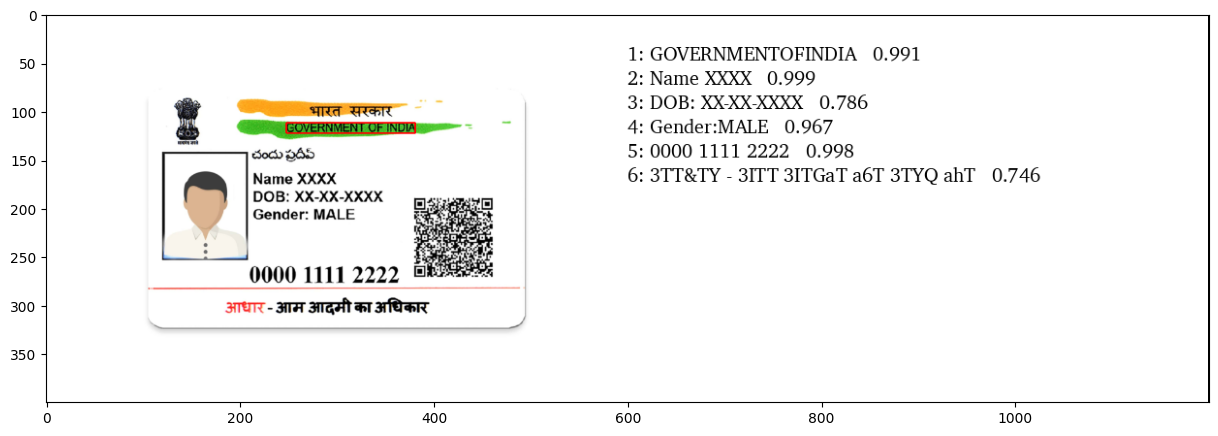

In [43]:
AadharDetailsExtractor()

Practising Regular Expressions

In [44]:
import re
x =[]
sample = ['1234 5678 1234','12345678 1234','1234 56781234','123456781234']
for t in sample:
    # Use regular expression to match the desired formats
    matches = re.findall(r'\d{4} \d{4} \d{4}|\d{8} \d{4}|\d{4} \d{8}|\d{12}', t)
    x.extend(matches)
for number in x:
    print(number)


1234 5678 1234
12345678 1234
1234 56781234
123456781234


For Single Aadhar Card:

In [119]:
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR

import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import traceback



def AadharNameExtractor(confidence_threshold=0.88):
    img_path_2 = os.path.join('.','CAAE81234 Aadhar Front.png')
    ocr = PaddleOCR(lang='en')
   
    result = ocr.ocr(img_path_2)
    print()
    print("The data extracted from Aadhar-Card: ")
    print()
    for res in result:
        for i in range(0, len(result[0]), 1):
            word = res[i][1][0]
            confidence = res[i][1][1]
            if confidence >= confidence_threshold:
                print(word)
    text_1 = [res[i][1][0] for i in range(0, len(result[0]), 1) for res in result if res[i][1][1] >= confidence_threshold]
    print(text_1)
    print(text_1[1],text_1[4])
    box_1 = [res[0][0] for i in range(0, len(result[0]), 1) for res in result if res[i][1][1] >= confidence_threshold]
    scores_1 = [res[i][1][1] for i in range(0, len(result[0]), 1) for res in result if res[i][1][1] >= confidence_threshold]
    font_path = os.path.join('PaddleOCR','doc','fonts','latin.ttf')
    img = cv2.imread(img_path_2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 15))
    annotated = draw_ocr(img, box_1, text_1, scores_1, font_path=font_path)
    plt.imshow(annotated)

    


In [ ]:
AadharNameExtractor(0.88)

In [27]:
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import re
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import traceback
filtered_numbers=[]

def votersid_extraction(confidence_threshold=0.88):
    path = r"C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\votersid_dataset"
    img_path_2 = os.path.join(path, 'card3.png')
    ocr = PaddleOCR(lang='en')
   
    result = ocr.ocr(img_path_2)
    print()
    print("The data extracted from Voters-Card: ")
    print()
    for res in result:
        for i in range(0, len(result[0]), 1):
            word = res[i][1][0]
            confidence = res[i][1][1]
            if confidence >= confidence_threshold:
                print(word)
    for res in result:
                for line in res:
                    text = line[1][0]
                    matches = re.findall(r'^[A-Za-z]{3}\d{7}$', text)
                    if matches:
                        filtered_numbers.extend(matches)
    print("The EPIC number is the voters Id card is :", filtered_numbers[0])
    

In [28]:
votersid_extraction(0.88)

[2023/06/21 23:38:12] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\user/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\user/.paddleocr/whl\\rec\\en\\en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_

Epic number extraction for multiple Voters ID :

In [10]:

import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import re
import os
import cv2
import matplotlib.pyplot as plt
from langdetect import detect
from paddleocr import PaddleOCR
import traceback
filtered_numbers = []
def epicNumbers(confidence_threshold=0.88):
    image_directory = r"C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\votersid_dataset"
    # Process each image in the directory
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            img_path = os.path.join(image_directory, filename)
            print("PATH:",img_path)
            result = ocr.ocr(img_path)
            for res in result:
                for line in res:
                    text = line[1][0]
                    matches = re.findall(r'^[A-Za-z]{3}\d{7}$', text)
                    if matches:
                        filtered_numbers.extend(matches)
    print()
    print("The EPIC number's in the voters Id card's are :", filtered_numbers)
            
    

In [11]:
epicNumbers(0.88)

PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\votersid_dataset\card2.jpeg
[2023/06/22 15:11:09] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/22 15:11:10] ppocr DEBUG: dt_boxes num : 14, elapse : 0.594268798828125
[2023/06/22 15:11:13] ppocr DEBUG: rec_res num  : 14, elapse : 3.783172130584717
PATH: C:\Users\user\OneDrive\Alan\Alan's Files\Internship\AadharCard-Details-Extractor\votersid_dataset\card3.png
[2023/06/22 15:11:13] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/06/22 15:11:14] ppocr DEBUG: dt_boxes num : 20, elapse : 0.1282649040222168
[2023/06/22 15:11:17] ppocr DEBUG: rec_res num  : 20, elapse : 2.9807567596435547

The EPIC number's in the voters Id card's are : ['KJC7967979', 'NOP1571827']
